**Work Problem**

A gaming company wants to create level based personas by using some characteristics of its customers and create segments according to these new customer definitions and estimate how much new customers can earn the company on average according to these segments.

For example:
To determine how much a 25-year-old male IOS user from Turkey can earn on average is wanted.

**Data Set Story**

Persona.csv dataset contains the prices of the products sold by an international game company and some demographic information of the users who purchased these products. The dataset consists of the records of each sales transaction. This means that the table is not deduplicated. In other words, a person with certain demographic characteristics the user may have made more than one purchase.

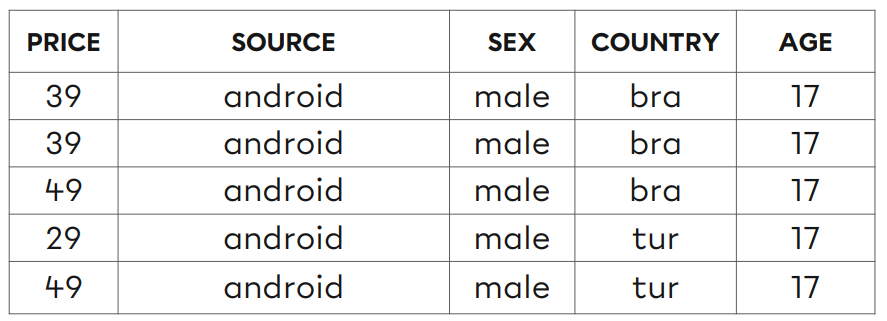

**Variables**

PRICE - Customer's expenditure amount

SOURCE - Type of device to which the customer is connected

SEX - Gender of the customer

COUNTRY - Country of the customer

AGE - Client's age

**Project Tasks**

# **TASK 1: Answer the following questions.**

**Question 1: Read the persona.csv file and show general information about the data set.**

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
df = pd.read_csv('/kaggle/input/personacsv/persona.csv')
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [2]:
df.shape

(5000, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


**Question 2: How many unique 'SOURCE' are there? What is their frequency?**

In [4]:
df["SOURCE"].nunique()

2

In [5]:
df["SOURCE"].value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

**Question 3: How many unique PRICE are there?**

In [6]:
df["PRICE"].nunique()

6

**Question 4: How many sales were realised at which PRICE?**

In [7]:
df["PRICE"].value_counts()

29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: PRICE, dtype: int64

**Question 5: How many sales were there from which country?**

In [8]:
df["COUNTRY"].value_counts()

usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64

In [9]:
df.groupby("COUNTRY")["PRICE"].count()

COUNTRY
bra    1496
can     230
deu     455
fra     303
tur     451
usa    2065
Name: PRICE, dtype: int64

In [10]:
df.pivot_table(values="PRICE",index="COUNTRY",aggfunc="count")

,PRICE
COUNTRY,
bra,1496
can,230
deu,455
fra,303
tur,451
usa,2065


**Question 6: What is the total amount earned from sales by country?**

In [11]:
df.groupby("COUNTRY")["PRICE"].sum()

COUNTRY
bra    51354
can     7730
deu    15485
fra    10177
tur    15689
usa    70225
Name: PRICE, dtype: int64

In [12]:
df.groupby("COUNTRY").agg({"PRICE": "sum"})

,PRICE
COUNTRY,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


In [13]:
df.pivot_table(values="PRICE",index="COUNTRY",aggfunc="sum")

,PRICE
COUNTRY,
bra,51354
can,7730
deu,15485
fra,10177
tur,15689
usa,70225


**Question 7: What is the number of sales according to SOURCE types?**

In [14]:
df["SOURCE"].value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

**Question 8: What are the PRICE averages by country?**

In [15]:
df.groupby(by=['COUNTRY']).agg({"PRICE": "mean"})

,PRICE
COUNTRY,
bra,34.327540
can,33.608696
deu,34.032967
fra,33.587459
tur,34.787140
usa,34.007264


**Question 9: What is the average PRICE by SOURCE?**

In [16]:
df.groupby(by=['SOURCE']).agg({"PRICE": "mean"})

,PRICE
SOURCE,
android,34.174849
ios,34.069102


**Questions 10: What are the PRICE averages in the COUNTRY-RESOURCE distribution?**

In [17]:
df.groupby(by=["COUNTRY", 'SOURCE']).agg({"PRICE": "mean"})

PRICE
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

# **TASK 2: What are the average earnings by COUNTRY, SOURCE, SEX, AGE?**

In [18]:
df.groupby(["COUNTRY", 'SOURCE', "SEX", "AGE"]).agg({"PRICE": "mean"}).head()

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897

# **TASK 3: Sort the output by PRICE.**
**To see the output of the previous question better, apply the sort_values method to PRICE in descending order.**

**Save the output as agg_df.**

In [19]:
agg_df = df.groupby(by=["COUNTRY", 'SOURCE', "SEX", "AGE"]).agg({"PRICE": "mean"}).sort_values("PRICE", ascending=False)
agg_df.head()

,,,,PRICE
COUNTRY,SOURCE,SEX,AGE,
bra,android,male,46,59.0
usa,android,male,36,59.0
fra,android,female,24,59.0
usa,ios,male,32,54.0
deu,android,female,36,49.0


# **TASK 4: Convert the names in the index to variable names.**

**All variables in the output of the third question except PRICE are index names.**

**Convert these names to variable names.**

In [20]:
agg_df = agg_df.reset_index()
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0


# TASK 5: Convert the variable AGE into a categorical variable and add it to agg_df.

**Convert the numeric variable Age to a categorical variable.**

**Specify how to divide the variable AGE:**

In [21]:
bins = [0, 18, 23, 30, 40, agg_df["AGE"].max()]

**Let us express what the nomenclature for the division points will be:**

In [22]:
mylabels = ['0_18', '19_23', '24_30', '31_40', '41_' + str(agg_df["AGE"].max())]

**Let's divide age:**

In [23]:
agg_df["age_cat"] = pd.cut(agg_df["AGE"], bins, labels=mylabels)
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,age_cat
0,bra,android,male,46,59.0,41_66
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40


# **TASK 6: Define new level based customers and add them as variables to the data set.**

**Define a variable named customers_level_based and add this variable to the data set.**

**Attention!**

**After creating customers_level_based values with list comp, these values must be deduplicated.**

**For example, there may be more than one of the following statements: USA_ANDROID_MALE_0_18**

**It is necessary to groupby them and take the price averages.**


**METHOD 1**

In [24]:
agg_df['customers_level_based'] = agg_df[['COUNTRY', 'SOURCE', 'SEX', 'age_cat']].agg(lambda x: '_'.join(x).upper(), axis=1)

**METHOD 2**

In [25]:
agg_df["customers_level_based"] = ['_'.join(i).upper() for i in agg_df.drop(["AGE", "PRICE"], axis=1).values]

**METHOD 3**

**Variable names:**

In [26]:
agg_df.columns

Index(['COUNTRY', 'SOURCE', 'SEX', 'AGE', 'PRICE', 'age_cat',
       'customers_level_based'],
      dtype='object')

**How do we access observation values?**

In [27]:
for row in agg_df.values:
    print(row)

['bra' 'android' 'male' 46 59.0 '41_66'
 'BRA_ANDROID_MALE_41_66_BRA_ANDROID_MALE_41_66']
['usa' 'android' 'male' 36 59.0 '31_40'
 'USA_ANDROID_MALE_31_40_USA_ANDROID_MALE_31_40']
['fra' 'android' 'female' 24 59.0 '24_30'
 'FRA_ANDROID_FEMALE_24_30_FRA_ANDROID_FEMALE_24_30']
['usa' 'ios' 'male' 32 54.0 '31_40'
 'USA_IOS_MALE_31_40_USA_IOS_MALE_31_40']
['deu' 'android' 'female' 36 49.0 '31_40'
 'DEU_ANDROID_FEMALE_31_40_DEU_ANDROID_FEMALE_31_40']
['deu' 'android' 'female' 51 49.0 '41_66'
 'DEU_ANDROID_FEMALE_41_66_DEU_ANDROID_FEMALE_41_66']
['deu' 'ios' 'male' 20 49.0 '19_23'
 'DEU_IOS_MALE_19_23_DEU_IOS_MALE_19_23']
['usa' 'android' 'female' 47 49.0 '41_66'
 'USA_ANDROID_FEMALE_41_66_USA_ANDROID_FEMALE_41_66']
['fra' 'ios' 'male' 20 49.0 '19_23'
 'FRA_IOS_MALE_19_23_FRA_IOS_MALE_19_23']
['usa' 'ios' 'male' 59 46.5 '41_66'
 'USA_IOS_MALE_41_66_USA_IOS_MALE_41_66']
['deu' 'android' 'male' 15 46.5 '0_18'
 'DEU_ANDROID_MALE_0_18_DEU_ANDROID_MALE_0_18']
['bra' 'android' 'female' 30 45.66666

**We want to put the VALUES of the variables COUNTRY, SOURCE, SEX and age_cat side by side and join them with a hyphen.**

**We can do this with list comprehension.**

**Let's perform the operation to select the observation values we need from the loop above:**

In [28]:
[row[0].upper() + "_" + row[1].upper() + "_" + row[2].upper() + "_" + row[5].upper() for row in agg_df.values]

['BRA_ANDROID_MALE_41_66',
 'USA_ANDROID_MALE_31_40',
 'FRA_ANDROID_FEMALE_24_30',
 'USA_IOS_MALE_31_40',
 'DEU_ANDROID_FEMALE_31_40',
 'DEU_ANDROID_FEMALE_41_66',
 'DEU_IOS_MALE_19_23',
 'USA_ANDROID_FEMALE_41_66',
 'FRA_IOS_MALE_19_23',
 'USA_IOS_MALE_41_66',
 'DEU_ANDROID_MALE_0_18',
 'BRA_ANDROID_FEMALE_24_30',
 'USA_ANDROID_FEMALE_41_66',
 'TUR_IOS_MALE_24_30',
 'DEU_ANDROID_MALE_31_40',
 'TUR_IOS_FEMALE_0_18',
 'BRA_ANDROID_FEMALE_41_66',
 'BRA_IOS_FEMALE_19_23',
 'TUR_ANDROID_FEMALE_31_40',
 'BRA_ANDROID_FEMALE_31_40',
 'TUR_IOS_MALE_31_40',
 'TUR_ANDROID_MALE_0_18',
 'USA_IOS_MALE_24_30',
 'BRA_IOS_MALE_41_66',
 'DEU_ANDROID_MALE_19_23',
 'USA_IOS_MALE_24_30',
 'TUR_ANDROID_FEMALE_0_18',
 'USA_ANDROID_MALE_41_66',
 'TUR_ANDROID_MALE_24_30',
 'USA_IOS_FEMALE_41_66',
 'FRA_ANDROID_MALE_19_23',
 'USA_IOS_MALE_31_40',
 'TUR_ANDROID_FEMALE_0_18',
 'FRA_IOS_MALE_0_18',
 'TUR_IOS_FEMALE_19_23',
 'TUR_ANDROID_FEMALE_31_40',
 'TUR_ANDROID_MALE_24_30',
 'FRA_ANDROID_MALE_19_23',
 'BRA_AN

**Let's add it to the data set:**

In [29]:
agg_df["customers_level_based"] = [row[0].upper() + "_" + row[1].upper() + "_" + row[2].upper() + "_" + row[5].upper() for row in agg_df.values]
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,age_cat,customers_level_based
0,bra,android,male,46,59.0,41_66,BRA_ANDROID_MALE_41_66
1,usa,android,male,36,59.0,31_40,USA_ANDROID_MALE_31_40
2,fra,android,female,24,59.0,24_30,FRA_ANDROID_FEMALE_24_30
3,usa,ios,male,32,54.0,31_40,USA_IOS_MALE_31_40
4,deu,android,female,36,49.0,31_40,DEU_ANDROID_FEMALE_31_40


**Let's remove unnecessary variables:**

In [30]:
agg_df = agg_df[["customers_level_based", "PRICE"]]
agg_df.head()

for i in agg_df["customers_level_based"].values:
    print(i.split("_"))

['BRA', 'ANDROID', 'MALE', '41', '66']
['USA', 'ANDROID', 'MALE', '31', '40']
['FRA', 'ANDROID', 'FEMALE', '24', '30']
['USA', 'IOS', 'MALE', '31', '40']
['DEU', 'ANDROID', 'FEMALE', '31', '40']
['DEU', 'ANDROID', 'FEMALE', '41', '66']
['DEU', 'IOS', 'MALE', '19', '23']
['USA', 'ANDROID', 'FEMALE', '41', '66']
['FRA', 'IOS', 'MALE', '19', '23']
['USA', 'IOS', 'MALE', '41', '66']
['DEU', 'ANDROID', 'MALE', '0', '18']
['BRA', 'ANDROID', 'FEMALE', '24', '30']
['USA', 'ANDROID', 'FEMALE', '41', '66']
['TUR', 'IOS', 'MALE', '24', '30']
['DEU', 'ANDROID', 'MALE', '31', '40']
['TUR', 'IOS', 'FEMALE', '0', '18']
['BRA', 'ANDROID', 'FEMALE', '41', '66']
['BRA', 'IOS', 'FEMALE', '19', '23']
['TUR', 'ANDROID', 'FEMALE', '31', '40']
['BRA', 'ANDROID', 'FEMALE', '31', '40']
['TUR', 'IOS', 'MALE', '31', '40']
['TUR', 'ANDROID', 'MALE', '0', '18']
['USA', 'IOS', 'MALE', '24', '30']
['BRA', 'IOS', 'MALE', '41', '66']
['DEU', 'ANDROID', 'MALE', '19', '23']
['USA', 'IOS', 'MALE', '24', '30']
['TUR', 'AN

**One step closer to our goal.**

**There's a slight problem here. There will be many identical segments.**

**For example, there can be many segments of USA_ANDROID_MALE_0_18.**

**Let's check:**

In [31]:
agg_df["customers_level_based"].value_counts()

BRA_ANDROID_MALE_24_30      7
USA_ANDROID_MALE_41_66      7
USA_IOS_FEMALE_24_30        7
BRA_ANDROID_FEMALE_24_30    7
USA_ANDROID_MALE_24_30      7
BRA_IOS_MALE_31_40          6
USA_ANDROID_FEMALE_24_30    6
USA_IOS_MALE_24_30          6
BRA_IOS_FEMALE_24_30        6
USA_ANDROID_MALE_31_40      6
BRA_ANDROID_FEMALE_31_40    6
USA_IOS_FEMALE_41_66        5
BRA_ANDROID_FEMALE_19_23    5
USA_ANDROID_FEMALE_31_40    5
TUR_IOS_FEMALE_19_23        5
BRA_IOS_MALE_41_66          5
BRA_ANDROID_MALE_19_23      5
USA_ANDROID_MALE_19_23      5
USA_ANDROID_FEMALE_19_23    5
DEU_ANDROID_MALE_31_40      5
BRA_IOS_FEMALE_31_40        5
USA_IOS_MALE_41_66          5
USA_ANDROID_FEMALE_41_66    5
USA_IOS_MALE_31_40          5
USA_IOS_FEMALE_19_23        5
DEU_IOS_FEMALE_0_18         4
USA_IOS_FEMALE_0_18         4
TUR_ANDROID_FEMALE_41_66    4
BRA_ANDROID_MALE_41_66      4
BRA_IOS_MALE_0_18           4
BRA_IOS_MALE_19_23          4
BRA_IOS_FEMALE_0_18         4
DEU_ANDROID_FEMALE_24_30    4
USA_ANDROI

**For this reason, after groupby according to the segments, we should take the price averages and deduplicate the segments.**

In [32]:
agg_df = agg_df.groupby("customers_level_based").agg({"PRICE": "mean"})

**customers_level_based is located in the index. Let's convert it to a variable.**

In [33]:
agg_df = agg_df.reset_index()
agg_df.head()

,customers_level_based,PRICE
0,BRA_ANDROID_FEMALE_0_18,35.645303
1,BRA_ANDROID_FEMALE_19_23,34.077340
2,BRA_ANDROID_FEMALE_24_30,33.863946
3,BRA_ANDROID_FEMALE_31_40,34.898326
4,BRA_ANDROID_FEMALE_41_66,36.737179


**Let's check. We expect each persona to have one:**

In [34]:
agg_df["customers_level_based"].value_counts()


BRA_ANDROID_FEMALE_0_18     1
TUR_ANDROID_FEMALE_0_18     1
TUR_IOS_FEMALE_19_23        1
TUR_IOS_FEMALE_0_18         1
TUR_ANDROID_MALE_41_66      1
TUR_ANDROID_MALE_31_40      1
TUR_ANDROID_MALE_24_30      1
TUR_ANDROID_MALE_19_23      1
TUR_ANDROID_MALE_0_18       1
TUR_ANDROID_FEMALE_41_66    1
TUR_ANDROID_FEMALE_31_40    1
TUR_ANDROID_FEMALE_24_30    1
TUR_ANDROID_FEMALE_19_23    1
FRA_IOS_MALE_41_66          1
FRA_ANDROID_FEMALE_31_40    1
FRA_IOS_MALE_31_40          1
FRA_IOS_MALE_24_30          1
FRA_IOS_MALE_19_23          1
FRA_IOS_MALE_0_18           1
FRA_IOS_FEMALE_31_40        1
FRA_IOS_FEMALE_24_30        1
FRA_IOS_FEMALE_0_18         1
FRA_ANDROID_MALE_41_66      1
FRA_ANDROID_MALE_31_40      1
FRA_ANDROID_MALE_24_30      1
FRA_ANDROID_MALE_19_23      1
TUR_IOS_FEMALE_24_30        1
TUR_IOS_FEMALE_31_40        1
TUR_IOS_FEMALE_41_66        1
TUR_IOS_MALE_0_18           1
USA_IOS_MALE_31_40          1
USA_IOS_MALE_24_30          1
USA_IOS_MALE_19_23          1
USA_IOS_MA

In [35]:
agg_df.head()

,customers_level_based,PRICE
0,BRA_ANDROID_FEMALE_0_18,35.645303
1,BRA_ANDROID_FEMALE_19_23,34.077340
2,BRA_ANDROID_FEMALE_24_30,33.863946
3,BRA_ANDROID_FEMALE_31_40,34.898326
4,BRA_ANDROID_FEMALE_41_66,36.737179


# **TASK 7: Segment new customers (USA_ANDROID_MALE_0_18).**

**Segment according to PRICE**

**Add the segments to agg_df with the name "SEGMENT"**

**Describe the segments**

In [36]:
agg_df["SEGMENT"] = pd.qcut(agg_df["PRICE"], 4, labels=["D", "C", "B", "A"])
agg_df.head(30)

,customers_level_based,PRICE,SEGMENT
0,BRA_ANDROID_FEMALE_0_18,35.645303,B
1,BRA_ANDROID_FEMALE_19_23,34.077340,C
2,BRA_ANDROID_FEMALE_24_30,33.863946,C
3,BRA_ANDROID_FEMALE_31_40,34.898326,B
4,BRA_ANDROID_FEMALE_41_66,36.737179,A
5,BRA_ANDROID_MALE_0_18,34.805861,B
6,BRA_ANDROID_MALE_19_23,31.673243,D
7,BRA_ANDROID_MALE_24_30,33.413919,C
8,BRA_ANDROID_MALE_31_40,34.327381,B
9,BRA_ANDROID_MALE_41_66,40.041667,A


In [37]:
agg_df.groupby("SEGMENT").agg({"PRICE": "mean"})

,PRICE
SEGMENT,
D,29.206780
C,33.509674
B,34.999645
A,38.691234


# **TASK 8: Categorise new customers and estimate how much revenue they can bring in.**

**To which segment does a 33-year-old ANDROID-using Turkish woman belong and how much income is she expected to earn on average?**

In [38]:
new_user = "TUR_ANDROID_FEMALE_31_40"
agg_df[agg_df["customers_level_based"] == new_user]

,customers_level_based,PRICE,SEGMENT
72,TUR_ANDROID_FEMALE_31_40,41.833333,A


**To which segment and how much revenue would a 35-year-old French woman using IOS be expected to bring in on average?**

In [39]:
new_user = "FRA_IOS_FEMALE_31_40"
agg_df[agg_df["customers_level_based"] == new_user]

,customers_level_based,PRICE,SEGMENT
63,FRA_IOS_FEMALE_31_40,32.818182,C
